In [120]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt

Convert image to grayscale image

In [121]:
orgiginIm = Image.open("hayasaka1.jpg").convert('L')   
L = 256

Get pixel map

In [122]:
pixelMap = np.asarray(orgiginIm)
wI, hI = np.shape(pixelMap)
print(pixelMap)

[[ 48  43  40 ... 108 108 108]
 [ 41  36  32 ... 108 108 108]
 [ 39  34  31 ... 108 108 108]
 ...
 [213 219 221 ... 232 232 224]
 [211 217 219 ... 230 230 222]
 [205 211 213 ... 223 222 214]]


Histogram count for origin image

In [123]:
def histogramCount(pMap):
    
    result = [0]*L
    width, height = np.shape(pMap)

    for i in range(width):
        for j in range(height):
            result[pMap[i, j]] += 1
    
    return result


pX = histogramCount(pixelMap)
print(pX)

[1, 17, 61, 218, 947, 2074, 1807, 3856, 4354, 3458, 2623, 1944, 2439, 2351, 2601, 2375, 2231, 2146, 1939, 1934, 2101, 2910, 3661, 3130, 2331, 2663, 2657, 3067, 3060, 3544, 4216, 5196, 5200, 4398, 4734, 4487, 4511, 4946, 4729, 4854, 5532, 8388, 9213, 20770, 44921, 27971, 27189, 23621, 22350, 21096, 22974, 26341, 25284, 22312, 28537, 33913, 38788, 40367, 38432, 41207, 25150, 22800, 25721, 25998, 22216, 20595, 20248, 20255, 20695, 19623, 17760, 17332, 17897, 17279, 15258, 14827, 13578, 12751, 12712, 11980, 11215, 10798, 10564, 9822, 9898, 10530, 10661, 10552, 10015, 9416, 9021, 8860, 9357, 8769, 7978, 7750, 7407, 7120, 7272, 7291, 7018, 6729, 6305, 6478, 7059, 6965, 5688, 5457, 5065, 4983, 4910, 4938, 5087, 5077, 5062, 4525, 4199, 4284, 3865, 3902, 3612, 3764, 3718, 3382, 3189, 3070, 2971, 2912, 2944, 2905, 2823, 2802, 2887, 2858, 2691, 2637, 2746, 3064, 3005, 2908, 2963, 2901, 2866, 2715, 2673, 2662, 2712, 2526, 2591, 2559, 2342, 2352, 2227, 2254, 2110, 2076, 1926, 1907, 2037, 1986, 2011

Define CDF 

In [124]:
def cdf(i):
    result = 0
    for j in range(i + 1):
        result += pX[j]
    return result

print(cdf(255))

2073600


Define mapping function

In [125]:
cdfm = cdf(np.min(pixelMap[np.nonzero(pixelMap)]))

def h(v):
    return math.ceil((cdf(v) - cdfm)/(wI*hI - cdfm)*(L - 1))

print(cdfm)

18


Mapping pixel to new image

In [126]:
nPx = [0]*L

for i in range(L):
    nPx[i] = h(i)

print(nPx)

[0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 10, 11, 11, 12, 12, 13, 14, 14, 15, 15, 16, 18, 20, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 60, 65, 70, 75, 80, 83, 86, 89, 92, 95, 97, 100, 102, 105, 107, 109, 112, 114, 116, 118, 120, 121, 123, 124, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 149, 150, 151, 152, 153, 154, 154, 155, 156, 156, 157, 157, 158, 159, 159, 160, 160, 161, 161, 162, 162, 163, 163, 164, 164, 164, 165, 165, 165, 166, 166, 166, 167, 167, 168, 168, 168, 169, 169, 169, 170, 170, 170, 171, 171, 171, 172, 172, 172, 173, 173, 173, 173, 174, 174, 174, 174, 175, 175, 175, 175, 176, 176, 176, 176, 177, 177, 177, 177, 177, 178, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 180, 180, 180, 180, 180, 180, 181, 181, 181, 181, 182, 182, 182, 183, 183, 184, 184, 185, 185, 185, 186, 186, 186, 187, 187, 187, 188, 188, 188, 189, 189, 190, 190, 191, 191, 192, 192, 193, 1

Create new image base on new pixel value

In [127]:
newIm = np.empty([wI, hI], dtype=int)

for i in range(wI):
    for j in range(hI):
        newIm[i, j] = nPx[pixelMap[i, j]]

print(newIm)

[[ 38  20  15 ... 156 156 156]
 [ 16  13  11 ... 156 156 156]
 [ 15  12  10 ... 156 156 156]
 ...
 [190 193 194 ... 201 201 196]
 [189 192 193 ... 199 199 195]
 [187 189 190 ... 195 195 191]]


Comparison between old image and new image

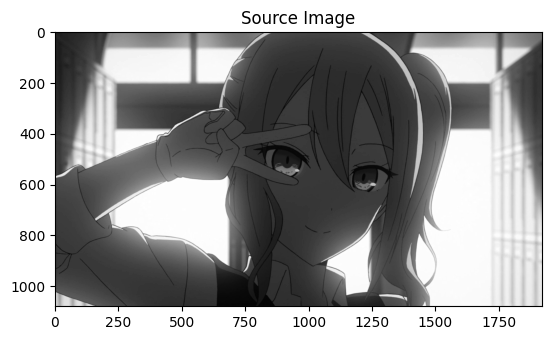

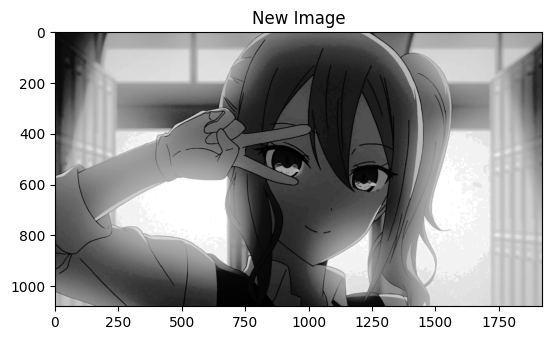

In [128]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.imshow(pixelMap, cmap='gray')
plt.title("Source Image")
plt.show()

plt.imshow(newIm, cmap='gray')
plt.title("New Image")
plt.show()

Comparison between old image's histogram and new image's histogram

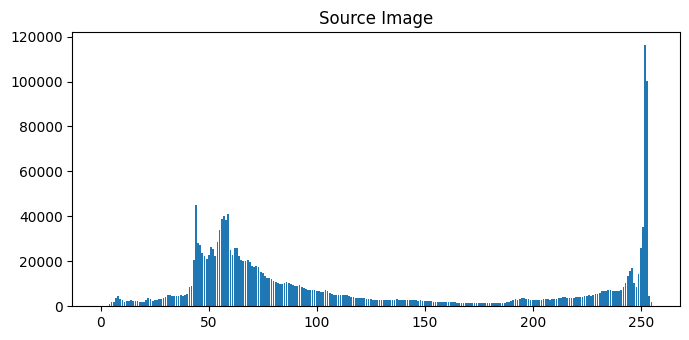

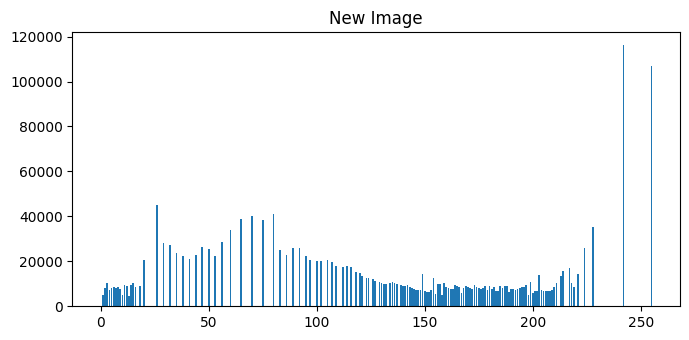

In [129]:
label = range(L)
plt.bar(label, pX)
plt.title("Source Image")
plt.show()

nIpM = histogramCount(newIm)
plt.bar(label, nIpM)
plt.title("New Image")
plt.show()